In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from __future__ import division
from linearalgebra import sum_of_squares, dot
import math

num_friends = [100,49,41,40,25,21,21,
               19,19,18,18,16,15,15,
               15,15,14,14,13,13,13,
               13,12,12,11,10,10,10,
               10,10,10,10,10,10,10,
               10,10,10,10,10,9,9,9,
               9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,9,8,8,8,8,8,8,8,
               8,8,8,8,8,8,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,7,6,
               6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,5,
               5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,5,5,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,
               4,4,4,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1]

friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]

plt.bar(xs, ys)
plt.title("Histogram of Friends Count")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.axis([0, 101, 0, 25])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# Some statistics about the data
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_value = sorted(num_friends)
second_smallest_value = sorted_value[1]
second_largest_value = sorted_value[-2]

print('Data Points : ', num_points)
print('Largest Value : ', largest_value)
print('Second Largest Value : ', second_largest_value)
print('Smallest Value : ', smallest_value)
print('Second Smallest Value : ', second_smallest_value)

Data Points :  204
Largest Value :  100
Second Largest Value :  49
Smallest Value :  1
Second Smallest Value :  1


<h1>Central Tendencies</h1>

In [3]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [4]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [5]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("10% : ", quantile(num_friends, 0.10))
print("25% : ", quantile(num_friends, 0.25))
print("75% : ", quantile(num_friends, 0.75))
print("90% : ", quantile(num_friends, 0.90))

10% :  1
25% :  3
75% :  9
90% :  13


In [6]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [xi for xi, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

<h1>Dispersion</h1>

In [7]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [8]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [xi - x_bar for xi in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

In [9]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [10]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

<h1>Correlation</h1>

In [12]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,
                 32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,
                 30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,
                 19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                 36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,
                 15.28,24.17,22.31,30.17,25.53,19.85,35.37,
                 44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,
                 34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
                 44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,
                 40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,
                 18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,
                 24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,
                 28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,
                 32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,
                 29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,
                 24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                 31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,
                 31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# variance
#   measures how a single variable deviates from its mean, covariance measures how two
#   variables vary in tandem from their means
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [13]:
# The correlation is unitless and always lies between -1 (perfect anti-correlation) and
# 1 (perfect correlation)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is 0
    
correlation(num_friends, daily_minutes)

0.24736957366478218

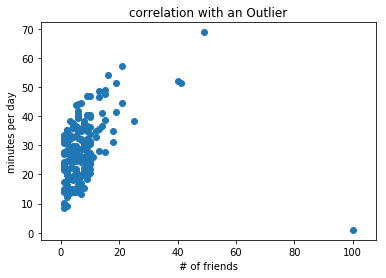

In [22]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.title("correlation with an Outlier")
plt.axis('equal')
plt.show()

In [20]:
# The person with 100 friends (who spends only one minute per day on the site) is a
# huge outlier, and correlation can be very sensitive to outliers. What happens if we
# ignore him?
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

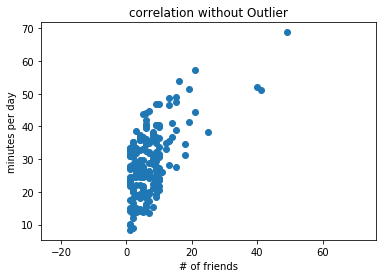

In [25]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.title("correlation without Outlier")
plt.axis('equal')
plt.show()